## Using Pandas to plot prior years on current year axis and prior years in non-standard calandar year format.

dataset source
https://data-nifc.opendata.arcgis.com/datasets/nifc::wfigs-wildland-fire-locations-full-history/about

In [3]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

### Read in and prepare data

In [949]:
# read in data
df = pd.read_csv('WFIGS_-_Wildland_Fire_Locations_Full_History.csv', low_memory=False)

In [950]:
df.shape

(185496, 92)

In [951]:
df.dtypes

X                               float64
Y                               float64
OBJECTID                          int64
ABCDMisc                         object
ADSPermissionState               object
                                 ...   
StrategicDecisionPublishDate     object
CreatedOnDateTime_dt             object
ModifiedOnDateTime_dt            object
Source                           object
GlobalID                         object
Length: 92, dtype: object

In [952]:
df.head()

,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,DispatchCenterID,FinalFireReportApprovedByTitle,FinalFireReportApprovedByUnit,FinalFireReportApprovedDate,FireBehaviorGeneral,FireBehaviorGeneral1,FireBehaviorGeneral2,FireBehaviorGeneral3,FireCause,FireCauseGeneral,FireCauseSpecific,FireCode,FireDepartmentID,FireDiscoveryDateTime,FireMgmtComplexity,FireOutDateTime,FireStrategyConfinePercent,FireStrategyFullSuppPercent,FireStrategyMonitorPercent,FireStrategyPointZonePercent,FSJobCode,FSOverrideCode,GACC,ICS209ReportDateTime,ICS209ReportForTimePeriodFrom,ICS209ReportForTimePeriodTo,ICS209ReportStatus,IncidentManagementOrganization,IncidentName,IncidentShortDescription,IncidentTypeCategory,IncidentTypeKind,InitialLatitude,InitialLongitude,InitialResponseAcres,InitialResponseDateTime,IrwinID,IsFireCauseInvestigated,IsFireCodeRequested,IsFSAssisted,IsMultiJurisdictional,IsReimbursable,IsTrespass,IsUnifiedCommand,LocalIncidentIdentifier,PercentContained,PercentPerimeterToBeContained,POOCity,POOCounty,POODispatchCenterID,POOFips,POOJurisdictionalAgency,POOJurisdictionalUnit,POOJurisdictionalUnitParentUnit,POOLandownerCategory,POOLandownerKind,POOLegalDescPrincipalMeridian,POOLegalDescQtr,POOLegalDescQtrQtr,POOLegalDescRange,POOLegalDescSection,POOLegalDescTownship,POOPredictiveServiceAreaID,POOProtectingAgency,POOProtectingUnit,POOState,PredominantFuelGroup,PredominantFuelModel,PrimaryFuelModel,SecondaryFuelModel,TotalIncidentPersonnel,UniqueFireIdentifier,WFDSSDecisionStatus,CreatedBySystem,ModifiedBySystem,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID
0,-104.457511,45.785037,1,NaN,CERTIFIED,50.64,2020/08/06 23:13:07+00,2020/08/06 23:13:25+00,50.6,20.0,MTMCC,NaN,NaN,2020/08/12 20:46:00+00,NaN,NaN,NaN,NaN,Human,Equipment,Farming Equipment,NDU0,NaN,2020/08/06 18:58:00+00,NaN,2020/08/12 14:00:00+00,NaN,NaN,NaN,NaN,PN,1502,NRCC,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,Ramme,NaN,WF,FI,45.78496,-104.4958,NaN,1970/01/01 00:00:00+00,fe67856c-7401-44bd-b6f3-9a57ef990079,NaN,0,1.0,0.0,0.0,0.0,NaN,000224,NaN,NaN,NaN,Carter,MTMCC,30011,C&L,MTLG42,NaN,Private,Private,NaN,NaN,NaN,NaN,NaN,NaN,NR16,C&L,MTLG42,US-MT,Grass,GR4,NaN,NaN,NaN,2020-MTLG42-000224,No Decision,wildcad,INFORM_Inspector,0,NaN,1970/01/01 00:00:00+00,2020/08/06 19:50:29.023+00,2020/08/12 20:46:01.557+00,IRWIN,e5436898-ed0d-4cb1-90c0-d61915fe1f29
1,-118.180712,33.808985,2,NaN,DEFAULT,NaN,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,0.1,CALACC,NaN,NaN,1970/01/01 00:00:00+00,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,2020/02/28 20:45:40+00,NaN,1970/01/01 00:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,OSCC,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,LAC-066100,NaN,WF,FI,33.80898,-118.1807,NaN,1970/01/01 00:00:00+00,6a311abb-df4f-4947-b8dd-3900bda784f6,NaN,0,NaN,NaN,NaN,NaN,NaN,066100,NaN,NaN,NaN,Los Angeles,CALACC,06037,NaN,CACAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC08,C&L,CALAC,US-CA,NaN,NaN,NaN,NaN,NaN,2020-CALAC-066100,No Decision,lacocad,lacocad,0,NaN,1970/01/01 00:00:00+00,2020/02/28 20:52:36.363+00,2020/02/28 20:52:36.363+00,IRWIN,0e79b7fd-2882-43cf-8cfa-911bd1c8f77a
2,-114.835414,48.073946,3,NaN,DEFAULT,NaN,2017/10/18 00:30:00+00,2017/10/18 00:35:00+00,50.0,50.0,MTKIC,NaN,NaN,1970/01/01 00:00:00+00,NaN,NaN,NaN,NaN,Human,NaN,NaN,NaN,NaN,2017/10/17 20:20:24+00,NaN,2017/11/09 22:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NRCC,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,South Lost Prairie,NaN,WF,FI,48.07167,-114.8303,1.0,1970/01/01 00:00:00+00,9599ae8e-66b8-4412-b849-7271271b0463,NaN,0,0.0,0.0,0.0,0.0,NaN,000878,NaN,NaN,NaN,Flathead,NaN,30029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NR02,DNRC,MTNWS,US-MT,NaN,NaN,NaN,NaN,NaN,2017-MTNWS-000878,NaN,wildcad,wildcad,0,NaN,1970/01/01 00:00:00+00,2017/10/18 13:46:40.483+00,2017/11/09 22:08:19.617+0

In [953]:
# the vast majority of fires are wildfires
df.IncidentTypeCategory.value_counts()

WF    174725
RX     10673
CX        98
Name: IncidentTypeCategory, dtype: int64

In [954]:
# what is the distribution by year?
df.FireOutDateTime.str.slice(start=0, stop=4).value_counts().sort_index()

1530        1
1970    72898
2009        3
2011        1
2012        1
2013        1
2014     9164
2015    13147
2016    13671
2017    16300
2018    15274
2019    14933
2020    21084
2021     9017
2022        1
Name: FireOutDateTime, dtype: int64

In [955]:
# exclude fires extinguished prior to 2015 since it looks spoty
df = df[df.FireOutDateTime.str.slice(start=0, stop=4).astype(int) > 2014]

In [956]:
[x for x in df.columns if 'Date' in x]

['ContainmentDateTime',
 'ControlDateTime',
 'FinalFireReportApprovedDate',
 'FireDiscoveryDateTime',
 'FireOutDateTime',
 'ICS209ReportDateTime',
 'InitialResponseDateTime',
 'StrategicDecisionPublishDate',
 'CreatedOnDateTime_dt',
 'ModifiedOnDateTime_dt']

In [957]:
# convert date columns to datetime dtype
for c in [x for x in df.columns if 'Date' in x]:
    df[c] = pd.to_datetime(df[c])

In [958]:
# exclude fires that were extinguished 
# at a date later than the latest date in the dataset
df = df[df.FireOutDateTime < str(datetime.datetime.today())]

In [959]:
df.FireOutDateTime.dt.year.value_counts().sort_index()

2015    13147
2016    13671
2017    16300
2018    15274
2019    14933
2020    21084
2021     8949
Name: FireOutDateTime, dtype: int64

# Plot prior years against current year

In [1021]:
#specify month that should be the separation between this year and next year
# assign as integer
break_month = 1

#### 1. set current year date range

In [1022]:
current_year = datetime.datetime.today().year

In [1023]:
# find current year date range
current_year_date_range = pd.date_range(pd.to_datetime(f'{current_year}'), pd.to_datetime(f'{current_year}-12-31'))

In [1024]:
current_year_date_range

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

#### 2. aggregate data

In [1025]:
df_agg = df.groupby([df.FireOutDateTime.dt.dayofyear, df.FireOutDateTime.dt.year])['CalculatedAcres'].size().round(0) \
    .rename_axis(['Date','Year']).unstack().fillna(0)

#### 3. map prior years onto current year

In [1026]:
 # if non leap year adjust days to match current year by consolidating count from day 366 to day 365
if len(current_year_date_range) != len(df_agg.index):

    df_agg.loc[len(current_year_date_range)] = df_agg.loc[df_agg.index.max()]

    # drop day 366
    df_agg.drop(df_agg[len(current_year_date_range) < df_agg.index].index, inplace=True)

In [1027]:
df_agg.tail()

Year,2015,2016,2017,2018,2019,2020,2021
Date,,,,,,,
361,0.0,3.0,14.0,6.0,4.0,16.0,0.0
362,1.0,3.0,7.0,2.0,5.0,11.0,0.0
363,2.0,6.0,11.0,1.0,2.0,24.0,0.0
364,5.0,5.0,6.0,3.0,17.0,23.0,0.0
365,0.0,18.0,0.0,0.0,0.0,170.0,0.0


In [1028]:
# assign index to be the date range of the current year
df_agg.sort_index(inplace=True)

df_agg = df_agg.cumsum()

df_agg.index = current_year_date_range

In [1029]:
# verify that index is sorted coresponding to the adj_day_sequence we created above
df_agg.sort_index()

Year,2015,2016,2017,2018,2019,2020,2021
2021-01-01,15.0,6.0,30.0,13.0,3.0,4.0,22.0
2021-01-02,15.0,6.0,33.0,29.0,4.0,16.0,32.0
2021-01-03,16.0,7.0,44.0,45.0,5.0,25.0,43.0
2021-01-04,17.0,12.0,52.0,52.0,5.0,26.0,87.0
2021-01-05,21.0,14.0,55.0,65.0,7.0,34.0,105.0
...,...,...,...,...,...,...,...
2021-12-27,13104.0,13606.0,16249.0,15250.0,14834.0,20838.0,8949.0
2021-12-28,13105.0,13609.0,16256.0,15252.0,14839.0,20849.0,8949.0
2021-12-29,13107.0,13615.0,16267.0,15253.0,14841.0,20873.0,8949.0
2021-12-30,13112.0,13620.0,16273.0,15256.0,14858.0,20896.0,8949.0


In [1030]:
# for the current year for days beyond the latest date remove cumsum() values
df_agg.loc[df_agg.loc[str(str(datetime.datetime.today().date())) < df_agg.index].index, current_year] = None

In [1031]:
df_agg.tail().style.highlight_null(null_color='yellow')

Year,2015,2016,2017,2018,2019,2020,2021
2021-12-27 00:00:00,13104.000000,13606.000000,16249.000000,15250.000000,14834.000000,20838.000000,nan
2021-12-28 00:00:00,13105.000000,13609.000000,16256.000000,15252.000000,14839.000000,20849.000000,nan
2021-12-29 00:00:00,13107.000000,13615.000000,16267.000000,15253.000000,14841.000000,20873.000000,nan
2021-12-30 00:00:00,13112.000000,13620.000000,16273.000000,15256.000000,14858.000000,20896.000000,nan
2021-12-31 00:00:00,13112.000000,13638.000000,16273.000000,15256.000000,14858.000000,21066.000000,nan


#### 4. plot

In [1032]:
df_agg.columns[df_agg.columns <= current_year]

Int64Index([2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='int64', name='Year')

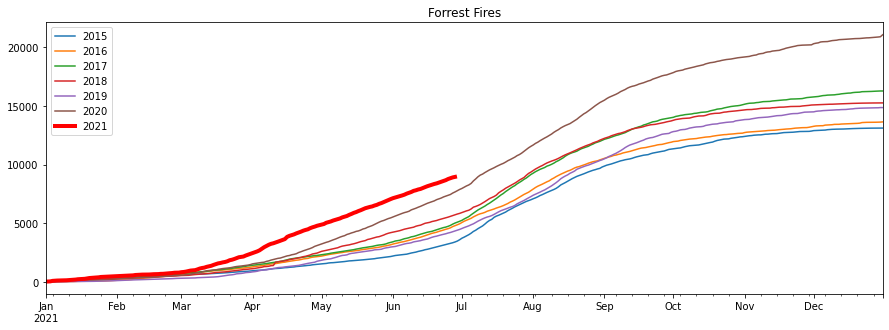

In [1033]:
# fig, ax = plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))

# plot prior years
df_agg.loc[:,df_agg.columns < current_year].plot(title='Forrest Fires', ax=ax)

# highlight current year by 
# plotting in red with extra thickness
df_agg.loc[:,df_agg.columns == current_year].plot(linewidth=4, color='red', ax=ax)

plt.legend(list(df_agg.columns[df_agg.columns <= current_year]));

# Plot prior years against current year in sequence not following standard calendar cycle

But perhaps we have a cycle that does't fit the normal calendar cycle.  Tax filing is a good example here.  April of the year following the year being taxed is the year demarcation point.  So if I wanted to measure the all tax returns filed, comparing the current year against prior years I would want to calendar year that runs roughly May - April.  Recently, as part of my job, I was working to track metrics around just such a non-calendar year cycle.  This motivated me to explore different ways of expressing data that doesn't track well with January - December.

In [1003]:
#specify month that should be the separation between this year and next year
# assign as integer
break_month = 10

#### 1. shift dates forward/backward based on break point month

In [1004]:
df_adj = df.copy()

In [1005]:
df_adj['FireOutDateTime'] = df_adj['FireOutDateTime'].mask(df_adj['FireOutDateTime'].dt.month >= break_month, df_adj['FireOutDateTime'] + pd.DateOffset(years=1))

In [1006]:
# now that we have re-assigned data to different year
# examine resulting months with no data
df_adj.groupby([df_adj.FireOutDateTime.dt.year, df_adj.FireOutDateTime.dt.month]).size().unstack().isna().style.applymap(lambda x: 'background-color: yellow' if x == True else '')

FireOutDateTime,1,2,3,4,5,6,7,8,9,10,11,12
FireOutDateTime,,,,,,,,,,,,
2015,False,False,False,False,False,False,False,False,False,True,True,True
2016,False,False,False,False,False,False,False,False,False,False,False,False
2017,False,False,False,False,False,False,False,False,False,False,False,False
2018,False,False,False,False,False,False,False,False,False,False,False,False
2019,False,False,False,False,False,False,False,False,False,False,False,False
2020,False,False,False,False,False,False,False,False,False,False,False,False
2021,False,False,False,False,False,False,True,True,True,False,False,False


#### 2. set current year date range

In [1007]:
current_year = datetime.datetime.today().year

In [1008]:
# find current year date range
current_year_date_range = pd.date_range(pd.to_datetime(f'{current_year - 1}-{break_month}'), 
                                       pd.to_datetime(f'{current_year}-{break_month}') - pd.DateOffset(days=1))

In [1009]:
current_year_date_range

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-10',
               ...
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-25', '2021-09-26', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', length=365, freq='D')

#### 3. set date sequence

In [1010]:
# create two lists and
# add them together
# to create sequencing we want
adj_day_sequence = [x for x in range(pd.to_datetime(f'{current_year}-{break_month}').dayofyear, pd.to_datetime(f'{current_year}-12-31').dayofyear + 1)] + \
[x for x in range(1, (pd.to_datetime(f'{current_year}-{break_month}') - pd.DateOffset(1)).dayofyear + 1)]

In [1011]:
str(adj_day_sequence)

'[274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 1

#### 4. aggregate data

In [1012]:
df_agg = df.groupby([df.FireOutDateTime.dt.dayofyear, df.FireOutDateTime.dt.year])['CalculatedAcres'].size().round(0) \
    .rename_axis(['Date','Year']).unstack().fillna(0)

#### 5. map prior years onto current year

In [1013]:
# adjust days to match current year
# by consolidating count from day 366 to day 365
df_agg.loc[len(current_year_date_range)] = df_agg.loc[df_agg.index.max()]

# drop day 366
df_agg.drop(df_agg[len(current_year_date_range) < df_agg.index].index, inplace=True)

In [1014]:
# assign index to be adjusted index sequencing
df_agg.index = pd.Categorical(df_agg.index, categories=adj_day_sequence, ordered=True)

In [1015]:
# assign index to be the date range of the current year
df_agg.sort_index(inplace=True)

df_agg = df_agg.cumsum()

df_agg.index = current_year_date_range

In [1016]:
# verify that index is sorted coresponding to the adj_day_sequence we created above
df_agg.sort_index()

Year,2015,2016,2017,2018,2019,2020,2021
2020-10-01,25.0,57.0,35.0,61.0,58.0,61.0,0.0
2020-10-02,62.0,79.0,109.0,119.0,85.0,151.0,0.0
2020-10-03,80.0,96.0,144.0,150.0,136.0,202.0,0.0
2020-10-04,100.0,150.0,191.0,185.0,203.0,234.0,0.0
2020-10-05,153.0,180.0,218.0,210.0,227.0,273.0,0.0
...,...,...,...,...,...,...,...
2021-09-26,12920.0,13453.0,16129.0,15093.0,14683.0,20844.0,8949.0
2021-09-27,12951.0,13504.0,16163.0,15125.0,14715.0,20892.0,8949.0
2021-09-28,13015.0,13552.0,16196.0,15177.0,14734.0,20924.0,8949.0
2021-09-29,13083.0,13600.0,16231.0,15217.0,14758.0,20993.0,8949.0


In [1017]:
# for the current year
# for days beyond the latest date
# remove cumsum() values
df_agg.loc[df_agg.loc[str(str(datetime.datetime.today().date())) < df_agg.index].index, current_year] = None

In [1018]:
df_agg.tail().style.highlight_null(null_color='yellow')

Year,2015,2016,2017,2018,2019,2020,2021
2021-09-26 00:00:00,12920.000000,13453.000000,16129.000000,15093.000000,14683.000000,20844.000000,nan
2021-09-27 00:00:00,12951.000000,13504.000000,16163.000000,15125.000000,14715.000000,20892.000000,nan
2021-09-28 00:00:00,13015.000000,13552.000000,16196.000000,15177.000000,14734.000000,20924.000000,nan
2021-09-29 00:00:00,13083.000000,13600.000000,16231.000000,15217.000000,14758.000000,20993.000000,nan
2021-09-30 00:00:00,13112.000000,13638.000000,16273.000000,15256.000000,14858.000000,21066.000000,nan


#### 6. plot

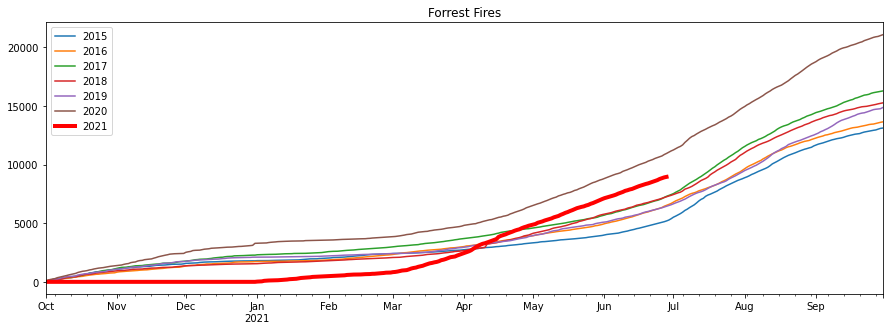

In [1019]:
# fig, ax = plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))

# plot prior years
df_agg.loc[:,df_agg.columns < current_year].plot(title='Forrest Fires', ax=ax)

# highlight current year by 
# plotting in red with extra thickness
df_agg.loc[:,df_agg.columns == current_year].plot(linewidth=4, color='red', ax=ax)

plt.legend(list(df_agg.columns[df_agg.columns <= current_year]));

Data expressed in non-calandar year format. 